## **Exemplo de Uso de LSTM**

### **REDES NEURAIS RECORRENTES**

### Profa. Roseli Ap. Francelin Romero

**PROBLEMA**: SERIE TEMPORAL - Previsão de passageiros de uma Cia Aérea Internacional.

Este é um problema em que, dados um ano e um mês, a tarefa é prever o número de passageiros (x 1.000) de companhias aéreas internacionais. Os dados variam de janeiro de 1949 a dezembro de 1960,  12 anos, com 144 observações.





Por default o Keras mantem um estado com um batch (stateful=True). Um batch é um no. de linhas do conjunto de dados usado para o treinamento. Entre uma camada e outra na LTSM o estado é desconsiderado (limpado) por default. Isto nos dá um controle mais fino entre os estados e podemos usar a função resetstates(). <\br>

**LSTM PARA REGRESSÃO** A cam. LSTM espera uma matriz como entrada: [samples, time steps, features], onde?

**Samples**: são as observações do dominio da aplicação, normalmente as linhas do dataset.</br> 
**Time steps**: são passos de tempo de separação de uma dada variavel para uma dada observação.</br>
**Features**: são medidas separadas observadas em cada tempo da observação.

Nesta série, os seguintes passos serão considerados:

- Carregar o dataset do CSV file.
- Transformar o dataset de modo a adequa-lo para o modelo LSTM, incluindo: 
- 1 - Transformar os dados para um problema de aprendizado supervisionado. 
- 2 - Transformar os dados para ser "stationary". 
- 3 - Transformar os dados para que fiquem no interv. [-1,1]. 
- 4 - Ajusta o modelo da rede LSTM para o conj. de treinamento. 
- 5 - Avaliar o modelo LSTM estático no conjunto de teste. 
- 6 - Visualizar o desempenho da Previsão. 

In [16]:

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# converte um array de valores numa matriz de dados 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):        
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
# Carregar o dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [17]:
# normalizar o dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [18]:
# dividir em conjuntos de train and test 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
# reshape em X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('X(t)', 'Y(t+1)')
for i in range(len(trainX)):
  print(trainX[i], trainY[i])
 

X(t) Y(t+1)
[0.01544401] 0.027027026
[0.02702703] 0.05405405
[0.05405405] 0.04826255
[0.04826255] 0.032818526
[0.03281853] 0.059845567
[0.05984557] 0.08494207
[0.08494207] 0.08494207
[0.08494207] 0.06177607
[0.06177607] 0.02895753
[0.02895753] 0.0
[0.] 0.027027026
[0.02702703] 0.021235526
[0.02123553] 0.042471036
[0.04247104] 0.07142857
[0.07142857] 0.059845567
[0.05984557] 0.040540546
[0.04054055] 0.08687258
[0.08687258] 0.12741312
[0.12741312] 0.12741312
[0.12741312] 0.10424709
[0.10424709] 0.055984557
[0.05598456] 0.01930502
[0.01930502] 0.06949806
[0.06949806] 0.07915059
[0.07915059] 0.08880308
[0.08880308] 0.14285713
[0.14285713] 0.11389962
[0.11389962] 0.13127413
[0.13127413] 0.14285713
[0.14285713] 0.18339768
[0.18339768] 0.18339768
[0.18339768] 0.15444016
[0.15444016] 0.11196911
[0.11196911] 0.08108109
[0.08108109] 0.1196911
[0.1196911] 0.12934363
[0.12934363] 0.14671814
[0.14671814] 0.17181468
[0.17181468] 0.14864865
[0.14864865] 0.15250966
[0.15250966] 0.22007722
[0.22007722]

In [20]:
# reshape entrada na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
# criando and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4)                 96        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fazer as predicoes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [23]:
# inverter antes as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE error root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.25 RMSE
Test Score: 52.84 RMSE


In [24]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Vamos plotar o dataset original em azul, as predicoes para o conj. de treinamento em verde, e as predicoes dos dados de test em vermelho.

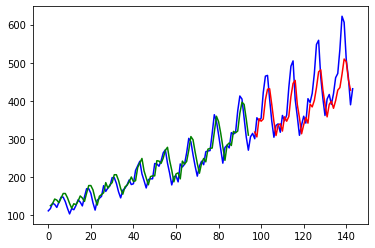

In [25]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color="blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()

Podemos ver que o modelo tem um erro médio de cerca de 23 passageiros (em milhares) no conjunto de dados de treinamento e cerca de 50 passageiros (em milhares) no conjunto de dados de teste. Não tão ruim.

####**LSTM for Regression Using the Window Method**

Também podemos formular o problema de forma que várias timesteps recentes possam ser usadas para fazer a previsão para o próximo timestep.

Isso é chamado de **janela**, e o tamanho da janela é um parâmetro que pode ser ajustado para cada problema.

Por exemplo, dado o tempo atual (t) que queremos prever o valor no próximo tempo na sequência (t + 1), podemos usar o tempo atual (t), bem como os dois tempos anteriores (t-1 e t-2) como variáveis ​​de entrada.

Quando formulado como um problema de regressão, as variáveis ​​de entrada são t-2, t-1, t e a variável de saída é t + 1.

A função **create_dataset()** criada nos permite criar esta formulação aumentando a var. **look_back** de 1 para 3.

Exemplo:</br>
X1	X2	X3	Y </br>
112	118	132	129 </br>
118	132	129	121 </br>
132	129	121	135 </br>
129	121	135	148 </br>
121	135	148	148 </br>

In [26]:
# reshape em X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
new_data=pd.DataFrame()
 

Epoch 1/100
92/92 - 2s - loss: 0.0470 - 2s/epoch - 18ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0172 - 164ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0125 - 140ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0108 - 139ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0095 - 145ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0082 - 142ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0071 - 144ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0062 - 142ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0055 - 145ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0049 - 150ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0045 - 137ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0043 - 157ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0040 - 158ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0039 - 133ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0038 - 174ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0037 - 134ms/epoc

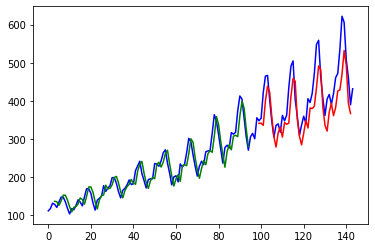

In [27]:
# reshape as entradas na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# cria e aplica a rede LSTM 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# fazer as predicoes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# inverter as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE - root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift prediçoes de treinamento para fazer o plot
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift prediçoes de teste para fazer o plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot original and predicoes
plt.plot(scaler.inverse_transform(dataset), color = "blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()

Podemos ver que o erro no conjunto de teste aumentou ligeiramente em relação ao da seção anterior. O tamanho da janela e a arquitetura da rede não foram ajustados: esta é apenas uma demonstração de como enjanelar um problema de previsão.

**LSTM com Memory entre os  Batches** </br>

Normalmente, o estado dentro da rede é redefinido após cada batch (lote) de treinamento ao ajustar o modelo, 
bem como cada chamada para model.predict () ou
 model.evaluate (). </br>

Podemos obter um controle mais preciso sobre quando o estado interno da rede LSTM é desconsiderado, 
tornando a camada LSTM “com estado”. </br>
Isso significa que ele pode criar um estado ao longo de toda a sequência de treinamento e 
até mesmo manter esse estado, se necessário, para fazer previsões. </br>
**Por exemplo:** </br>
for i in range(100): </br>
		

> model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False) </br>


> model.reset_states() </br>

94/94 - 3s - loss: 0.0039 - 3s/epoch - 31ms/step
94/94 - 0s - loss: 0.0042 - 158ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0039 - 147ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0039 - 152ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0038 - 149ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0038 - 145ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0038 - 142ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0038 - 150ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0037 - 140ms/epoch - 1ms/step
94/94 - 0s - loss: 0.0037 - 134ms/epoch - 1ms/step
94/94 - 0s - loss: 0.0037 - 156ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0037 - 148ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0036 - 149ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0036 - 139ms/epoch - 1ms/step
94/94 - 0s - loss: 0.0036 - 147ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0036 - 144ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0036 - 150ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0035 - 151ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0035 - 145ms/epoch - 2ms/step
94/94 - 0s - loss: 0.0035 - 135ms

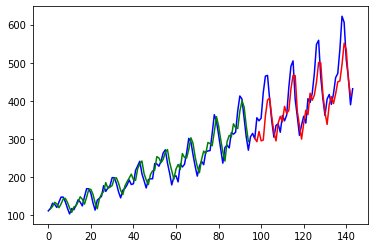

In [31]:
## LSTM para o problema para passageiros em Cia Aerea Intern. com Memoria


# separar em conjuntos de train and test 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape em X=t and Y=t+1 agora com 3 timesteps anteriores
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape entrada na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# criar e aplicar a rede LSTM 
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#Nos treinaremos para todos os exemplos em cada epoca e resetamos o estado da rede no final
# de cada epoca manualmente.
#Ou seja, os pesos são atualizados ao final de cada epoca
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)	
	model.reset_states()
# fazer as predicoes
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# inverter as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE - root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift predicoes de treinamento para plotar
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift predicoes de teste para plotar
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot original e predicoes
plt.plot(scaler.inverse_transform(dataset), color="blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()